In [2]:
%load_ext autoreload

In [3]:
import os 
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import Delaunay

from sklearn.cluster import KMeans


%autoreload 2
from alpha_clustering.alpha_shape import AlphaShape2D, AlphaShape3D, AlphaShapeND
from alpha_clustering.cluster import Cluster
from alpha_clustering.plot import Plot
from alpha_clustering.io_handler import IOHandler

plt.rcParams["axes.edgecolor"] = (0.33, 0.32, 0.29)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.color"] = (0.33, 0.32, 0.29)
plt.rcParams["ytick.color"] = (0.33, 0.32, 0.29)

In [5]:
io_handler = IOHandler(
    Path("data/points"),
    Path("../master_seminar_presentation/res")
)

In [6]:
data_random_1 = io_handler.load_point_cloud("random-1.csv")
complex_9 = io_handler.load_point_cloud("complex9.arff")
aggregation = io_handler.load_point_cloud("aggregation.arff")
d2_20c_no0 = io_handler.load_point_cloud("2d-20c-no0.arff")
st_900 = io_handler.load_point_cloud("st900-2-9.arff")
spectral = io_handler.load_point_cloud("spectral.arff")
test = io_handler.load_point_cloud("test.arff")
test_2 = io_handler.load_point_cloud("test_2.arff")
test_3 = io_handler.load_point_cloud("test_3.arff")
bio_protein = io_handler.load_point_cloud("bio-protein.arff")
hypercube = io_handler.load_point_cloud("hypercube.arff")
chainlink = io_handler.load_point_cloud("chainlink.arff")
golf_ball = io_handler.load_point_cloud("golf-ball.arff")
tesseract = io_handler.load_point_cloud("tesseract.arff")
hepta = io_handler.load_point_cloud("hepta.arff")

INFO 	 08-11-22 11:53:25 Loading point cloud 'random-1.csv' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'complex9.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'aggregation.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud '2d-20c-no0.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'st900-2-9.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'spectral.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'test.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'test_2.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'test_3.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'bio-protein.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'hypercube.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 Loading point cloud 'chainlink.arff' from 'data/points'.
INFO 	 08-11-22 11:53:25 L

INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 08-11-22 11:33:09 Constructed the delaunay triangulation with furthest_site = False and 78693 sim

1
Error in callback <function _draw_all_if_interactive at 0x12ec97100> (for post_execute):


KeyboardInterrupt: 

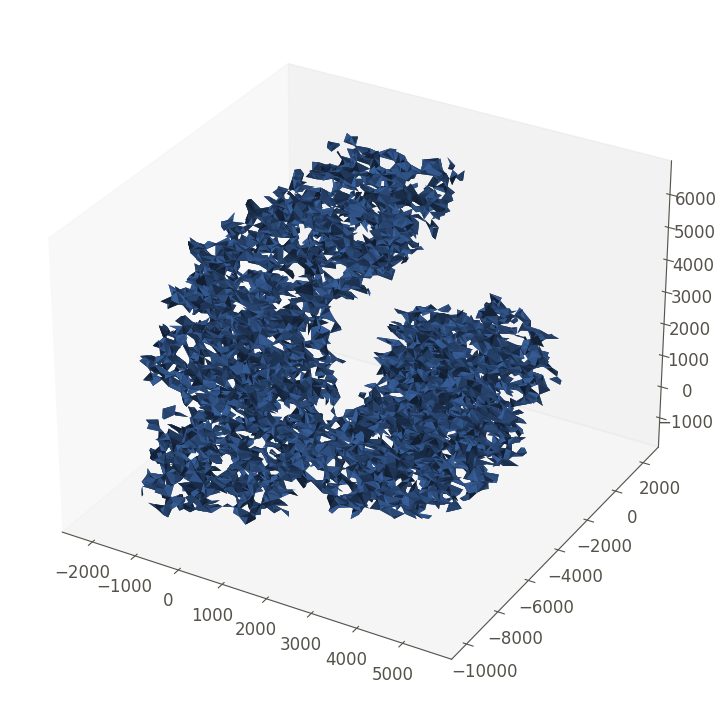

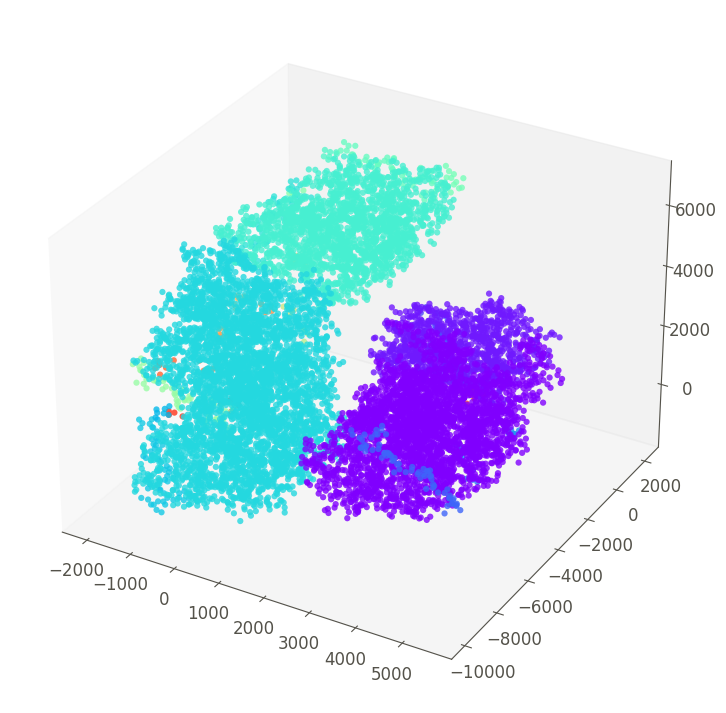

In [360]:
dataset = bio_protein
n_true_clusters = len(np.unique(dataset.iloc[:, -1].to_numpy()))
points = dataset.iloc[:, : -1].to_numpy()
alpha = 0.005255
if points.shape[1] == 2:
    ac = AlphaShape2D(points, alpha)
else:
    ac = AlphaShape3D(points, alpha)

plot = Plot(vertices = points)
ac.fit()
clustering = Cluster(ac.get_shape)
k_means = KMeans(n_clusters = n_true_clusters)
clustering.fit()
print(n_true_clusters)
fig = plot.alpha_shape(ac.get_shape, points_q = False)
fig = plot.clusters(clustering.predict())

In [ ]:
ac1 = AlphaShape2D(data_random_1.to_numpy(), -0.004)
ac1.fit()

ac2 = AlphaShape2D(data_random_1.to_numpy(), 0.0)
ac2.fit()

ac3 = AlphaShape2D(data_random_1.to_numpy(), 0.1)
ac3.fit()

plot = Plot(vertices = data_random_1.to_numpy()) 
fig1 = plot.alpha_shape(ac1.get_shape)
fig2, ax = plt.subplots(figsize = (16, 9), dpi = 300)
edges = ac2.get_shape[1]
ax.scatter(data_random_1.iloc[:, 0], data_random_1.iloc[:, 1], color = sns.color_palette("mako", 50)[30], alpha = 0.8)
for edge in edges:
    ax.plot(
        data_random_1.to_numpy()[edge, 0],
        data_random_1.to_numpy()[edge, 1],
        color = sns.color_palette("mako", 50)[20],
        linewidth = 1.0
    )
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig3 = plot.alpha_shape(ac3.get_shape)


In [ ]:
io_handler.write_figs(
    "random-1", 
    [fig1, fig2, fig3], 
    ["alpha_shape_1.png", "alpha_shape_2.png", "alpha_shape_3.png"]
)

INFO 	 04-11-22 09:58:43 Writing figure 'alpha_shape_1.png' to '../master_seminar_presentation/res/figs/random-1-figures'.
INFO 	 04-11-22 09:58:44 Writing figure 'alpha_shape_2.png' to '../master_seminar_presentation/res/figs/random-1-figures'.
INFO 	 04-11-22 09:58:46 Writing figure 'alpha_shape_3.png' to '../master_seminar_presentation/res/figs/random-1-figures'.


In [ ]:
from typing import Iterable
def circum_radius_triangle_heron(triangle: np.ndarray) -> float:
    a = np.linalg.norm(triangle[0] - triangle[1])
    b = np.linalg.norm(triangle[1] - triangle[2])
    c = np.linalg.norm(triangle[2] - triangle[0])
    s = (a + b + c) / 2
    return a * b * c / (4 * np.sqrt(s * (s - a) * (s - b) * (s - c)))

def circum_radius(simplex: np.ndarray) -> float:
    distances = np.linalg.norm(simplex[:, None] - simplex, axis = -1) ** 2
    m, n = distances.shape
    cayley_menger = np.block([
        [0,               np.ones((1, n))],
        [np.ones((m, 1)), distances],
    ])
    return np.sqrt(np.linalg.det(distances) / (-2 * np.linalg.det(cayley_menger)))

simplex_1 = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1]], dtype = np.float64)
simplex_2 = np.array(
    [[0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]],
    dtype = np.float64
)
# print(circum_radius_triangle_heron(simplex))
print(circum_radius(simplex_1))
print(circum_radius(simplex_2))


0.8660254037844389
1.1180339887498951


INFO 	 08-11-22 11:56:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:37 Fitting the cluster model...
INFO 	 08-11-22 11:56:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


=================================== new run ====================================
==========================alpha: 0.002, n_clusters: 1===========================
=================================== new run ====================================


INFO 	 08-11-22 11:56:37 Fitting the cluster model...
INFO 	 08-11-22 11:56:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


==========================alpha: 0.003, n_clusters: 1===========================
=================================== new run ====================================
==========================alpha: 0.004, n_clusters: 1===========================
=================================== new run ====================================


INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


==========================alpha: 0.005, n_clusters: 1===========================
=================================== new run ====================================
==========================alpha: 0.006, n_clusters: 1===========================
=================================== new run ====================================


INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


==========================alpha: 0.007, n_clusters: 1===========================
=================================== new run ====================================
==========================alpha: 0.008, n_clusters: 1===========================
=================================== new run ====================================


INFO 	 08-11-22 11:56:38 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.009000000000000001, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.010000000000000002, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.011000000000000003, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.012000000000000004, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.013000000000000005, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.014000000000000005, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:39 Fitting the cluster model...
INFO 	 08-11-22 11:56:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.015000000000000006, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.016000000000000007, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.017000000000000008, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.01800000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.01900000000000001, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.02000000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:40 Fitting the cluster model...
INFO 	 08-11-22 11:56:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.02100000000000001, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.022000000000000013, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.023000000000000013, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.024000000000000014, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.025000000000000015, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.026000000000000016, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:41 Fitting the cluster model...
INFO 	 08-11-22 11:56:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.027000000000000017, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.028000000000000018, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.02900000000000002, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.03000000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.03100000000000002, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.03200000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:42 Fitting the cluster model...
INFO 	 08-11-22 11:56:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.03300000000000002, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.03400000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.035000000000000024, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.036000000000000025, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.037000000000000026, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.03800000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:43 Fitting the cluster model...
INFO 	 08-11-22 11:56:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.03900000000000003, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.04000000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.04100000000000003, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.04200000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.04300000000000003, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.04400000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:44 Fitting the cluster model...
INFO 	 08-11-22 11:56:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.04500000000000003, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.046000000000000034, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.047000000000000035, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.048000000000000036, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.04900000000000004, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.05000000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:45 Fitting the cluster model...
INFO 	 08-11-22 11:56:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.05100000000000004, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.05200000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.05300000000000004, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.05400000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.05500000000000004, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.05600000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:46 Fitting the cluster model...
INFO 	 08-11-22 11:56:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.057000000000000044, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.058000000000000045, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...


===================alpha: 0.059000000000000045, n_clusters: 1===================
=================================== new run ====================================


INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.060000000000000046, n_clusters: 1===================
=================================== new run ====================================
===================alpha: 0.06100000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.06200000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.06300000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:47 Fitting the cluster model...
INFO 	 08-11-22 11:56:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.06400000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:48 Fitting the cluster model...
INFO 	 08-11-22 11:56:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.06500000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:48 Fitting the cluster model...
INFO 	 08-11-22 11:56:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:48 Fitting the cluster model...


===================alpha: 0.06600000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:48 Fitting the cluster model...
INFO 	 08-11-22 11:56:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.06700000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.06800000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:48 Fitting the cluster model...
INFO 	 08-11-22 11:56:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.06900000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.07000000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.07100000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.07200000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.07300000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.07400000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:49 Fitting the cluster model...
INFO 	 08-11-22 11:56:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...


===================alpha: 0.07500000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.07600000000000005, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.07700000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.07800000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.07900000000000006, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:50 Fitting the cluster model...
INFO 	 08-11-22 11:56:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.08000000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.08100000000000006, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.08200000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.08300000000000006, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.08400000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.08500000000000006, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:51 Fitting the cluster model...
INFO 	 08-11-22 11:56:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.08600000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.08700000000000006, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.08800000000000006, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.08900000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.09000000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.09100000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:52 Fitting the cluster model...
INFO 	 08-11-22 11:56:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.09200000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.09300000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.09400000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.09500000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.09600000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.09700000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.09800000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.09900000000000007, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:53 Fitting the cluster model...
INFO 	 08-11-22 11:56:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.10000000000000007, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.10100000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.10200000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.10300000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.10400000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.10500000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:54 Fitting the cluster model...
INFO 	 08-11-22 11:56:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.10600000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.10700000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.10800000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.10900000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.11000000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.11100000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:55 Fitting the cluster model...
INFO 	 08-11-22 11:56:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.11200000000000009, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.11300000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.11400000000000009, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.11500000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.11600000000000009, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.11700000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:56 Fitting the cluster model...
INFO 	 08-11-22 11:56:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.11800000000000009, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.11900000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...


===================alpha: 0.12000000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1210000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1220000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:57 Fitting the cluster model...
INFO 	 08-11-22 11:56:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1230000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1240000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.12500000000000008, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.12600000000000008, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.12700000000000009, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.12800000000000009, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:58 Fitting the cluster model...
INFO 	 08-11-22 11:56:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1290000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1300000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1310000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1320000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1330000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1340000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:56:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:56:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1350000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1360000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:56:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1370000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1380000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1390000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1400000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1410000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1420000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:00 Fitting the cluster model...
INFO 	 08-11-22 11:57:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1430000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1440000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1450000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1460000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1470000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1480000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:01 Fitting the cluster model...
INFO 	 08-11-22 11:57:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1490000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1500000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1510000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1520000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1530000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1540000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:02 Fitting the cluster model...
INFO 	 08-11-22 11:57:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1550000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1560000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1570000000000001, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.1580000000000001, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.1590000000000001, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.16000000000000011, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:03 Fitting the cluster model...
INFO 	 08-11-22 11:57:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.16100000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.16200000000000012, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.16300000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.16400000000000012, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.16500000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.16600000000000012, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:04 Fitting the cluster model...
INFO 	 08-11-22 11:57:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.16700000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.16800000000000012, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.16900000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.17000000000000012, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.17100000000000012, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.17200000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:05 Fitting the cluster model...
INFO 	 08-11-22 11:57:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:06 Fitting the cluster model...
INFO 	 08-11-22 11:57:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.17300000000000013, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.17400000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:06 Fitting the cluster model...
INFO 	 08-11-22 11:57:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:06 Fitting the cluster model...
INFO 	 08-11-22 11:57:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.17500000000000013, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.17600000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:06 Fitting the cluster model...
INFO 	 08-11-22 11:57:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.17700000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:06 Fitting the cluster model...
INFO 	 08-11-22 11:57:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.17800000000000013, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.17900000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...


===================alpha: 0.18000000000000013, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.18100000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.18200000000000013, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:07 Fitting the cluster model...
INFO 	 08-11-22 11:57:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.18300000000000013, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.18400000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:08 Fitting the cluster model...
INFO 	 08-11-22 11:57:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:08 Fitting the cluster model...
INFO 	 08-11-22 11:57:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.18500000000000014, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.18600000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:08 Fitting the cluster model...
INFO 	 08-11-22 11:57:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.18700000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:08 Fitting the cluster model...
INFO 	 08-11-22 11:57:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:08 Fitting the cluster model...
INFO 	 08-11-22 11:57:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.18800000000000014, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.18900000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:09 Fitting the cluster model...
INFO 	 08-11-22 11:57:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:09 Fitting the cluster model...
INFO 	 08-11-22 11:57:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.19000000000000014, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.19100000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:09 Fitting the cluster model...
INFO 	 08-11-22 11:57:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:09 Fitting the cluster model...
INFO 	 08-11-22 11:57:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.19200000000000014, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.19300000000000014, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:09 Fitting the cluster model...
INFO 	 08-11-22 11:57:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:10 Fitting the cluster model...
INFO 	 08-11-22 11:57:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.19400000000000014, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.19500000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:10 Fitting the cluster model...
INFO 	 08-11-22 11:57:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:10 Fitting the cluster model...
INFO 	 08-11-22 11:57:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.19600000000000015, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.19700000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:10 Fitting the cluster model...
INFO 	 08-11-22 11:57:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:10 Fitting the cluster model...
INFO 	 08-11-22 11:57:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.19800000000000015, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.19900000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...


===================alpha: 0.20000000000000015, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.20100000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.20200000000000015, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.20300000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:11 Fitting the cluster model...
INFO 	 08-11-22 11:57:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.20400000000000015, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.20500000000000015, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:12 Fitting the cluster model...
INFO 	 08-11-22 11:57:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:12 Fitting the cluster model...
INFO 	 08-11-22 11:57:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.20600000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.20700000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:12 Fitting the cluster model...
INFO 	 08-11-22 11:57:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:12 Fitting the cluster model...
INFO 	 08-11-22 11:57:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.20800000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.20900000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:12 Fitting the cluster model...
INFO 	 08-11-22 11:57:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.21000000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.21100000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.21200000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.21300000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.21400000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.21500000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:13 Fitting the cluster model...
INFO 	 08-11-22 11:57:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.21600000000000016, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.21700000000000016, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.21800000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.21900000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.22000000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.22100000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:14 Fitting the cluster model...
INFO 	 08-11-22 11:57:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.22200000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.22300000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.22400000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.22500000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.22600000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.22700000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:15 Fitting the cluster model...
INFO 	 08-11-22 11:57:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.22800000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.22900000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.23000000000000018, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.23100000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.23200000000000018, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.23300000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:16 Fitting the cluster model...
INFO 	 08-11-22 11:57:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.23400000000000018, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.23500000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.23600000000000018, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.23700000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.23800000000000018, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.23900000000000018, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:17 Fitting the cluster model...
INFO 	 08-11-22 11:57:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.24000000000000019, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2410000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2420000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2430000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2440000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2450000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:18 Fitting the cluster model...
INFO 	 08-11-22 11:57:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2460000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2470000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2480000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2490000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.25000000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.25100000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:19 Fitting the cluster model...
INFO 	 08-11-22 11:57:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.25200000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.25300000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.25400000000000017, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.25500000000000017, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.25600000000000017, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2570000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:20 Fitting the cluster model...
INFO 	 08-11-22 11:57:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2580000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2590000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2600000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2610000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2620000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2630000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:21 Fitting the cluster model...
INFO 	 08-11-22 11:57:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:22 Fitting the cluster model...
INFO 	 08-11-22 11:57:22 Predicting the clusters using the α-shape...


====================alpha: 0.2640000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2650000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:22 Fitting the cluster model...
INFO 	 08-11-22 11:57:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:22 Fitting the cluster model...
INFO 	 08-11-22 11:57:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2660000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2670000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:22 Fitting the cluster model...
INFO 	 08-11-22 11:57:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:22 Fitting the cluster model...
INFO 	 08-11-22 11:57:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2680000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2690000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2700000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2710000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2720000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2730000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2740000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:23 Fitting the cluster model...
INFO 	 08-11-22 11:57:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2750000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2760000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2770000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2780000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2790000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2800000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:24 Fitting the cluster model...
INFO 	 08-11-22 11:57:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:25 Fitting the cluster model...
INFO 	 08-11-22 11:57:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2810000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2820000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:25 Fitting the cluster model...
INFO 	 08-11-22 11:57:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:25 Fitting the cluster model...
INFO 	 08-11-22 11:57:25 Predicting the clusters using the α-shape...


====================alpha: 0.2830000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2840000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:25 Fitting the cluster model...
INFO 	 08-11-22 11:57:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2850000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:26 Fitting the cluster model...
INFO 	 08-11-22 11:57:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:26 Fitting the cluster model...
INFO 	 08-11-22 11:57:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2860000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2870000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:26 Fitting the cluster model...
INFO 	 08-11-22 11:57:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2880000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:26 Fitting the cluster model...
INFO 	 08-11-22 11:57:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:26 Fitting the cluster model...
INFO 	 08-11-22 11:57:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2890000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2900000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:27 Fitting the cluster model...
INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:27 Fitting the cluster model...


====================alpha: 0.2910000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:27 Fitting the cluster model...
INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2920000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2930000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:27 Fitting the cluster model...
INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:27 Fitting the cluster model...
INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2940000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2950000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:27 Fitting the cluster model...
INFO 	 08-11-22 11:57:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:28 Fitting the cluster model...
INFO 	 08-11-22 11:57:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2960000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2970000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:28 Fitting the cluster model...
INFO 	 08-11-22 11:57:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:28 Fitting the cluster model...
INFO 	 08-11-22 11:57:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.2980000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.2990000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:28 Fitting the cluster model...
INFO 	 08-11-22 11:57:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:28 Fitting the cluster model...
INFO 	 08-11-22 11:57:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3000000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3010000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3020000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3030000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3040000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3050000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:29 Fitting the cluster model...
INFO 	 08-11-22 11:57:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3060000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3070000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3080000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3090000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3100000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3110000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:30 Fitting the cluster model...
INFO 	 08-11-22 11:57:30 Predicting the clusters using the α-shape...


====================alpha: 0.3120000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3130000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:31 Fitting the cluster model...
INFO 	 08-11-22 11:57:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:31 Fitting the cluster model...
INFO 	 08-11-22 11:57:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3140000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3150000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:31 Fitting the cluster model...
INFO 	 08-11-22 11:57:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:31 Fitting the cluster model...
INFO 	 08-11-22 11:57:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3160000000000002, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3170000000000002, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:31 Fitting the cluster model...
INFO 	 08-11-22 11:57:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3180000000000002, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.31900000000000023, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.32000000000000023, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.32100000000000023, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.32200000000000023, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.32300000000000023, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:32 Fitting the cluster model...
INFO 	 08-11-22 11:57:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.32400000000000023, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.32500000000000023, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.32600000000000023, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.32700000000000023, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.32800000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.32900000000000024, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:33 Fitting the cluster model...
INFO 	 08-11-22 11:57:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.33000000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.33100000000000024, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.33200000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.33300000000000024, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.33400000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.33500000000000024, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:34 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:35 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...


===================alpha: 0.33600000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.33700000000000024, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:35 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:35 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.33800000000000024, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.33900000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:35 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:35 Fitting the cluster model...
INFO 	 08-11-22 11:57:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.34000000000000025, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.34100000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...


===================alpha: 0.34200000000000025, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.34300000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.34400000000000025, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.34500000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:36 Fitting the cluster model...
INFO 	 08-11-22 11:57:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.34600000000000025, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.34700000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:37 Fitting the cluster model...
INFO 	 08-11-22 11:57:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:37 Fitting the cluster model...
INFO 	 08-11-22 11:57:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.34800000000000025, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.34900000000000025, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:37 Fitting the cluster model...
INFO 	 08-11-22 11:57:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:37 Fitting the cluster model...
INFO 	 08-11-22 11:57:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.35000000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.35100000000000026, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:37 Fitting the cluster model...
INFO 	 08-11-22 11:57:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.35200000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.35300000000000026, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.35400000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.35500000000000026, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.35600000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.35700000000000026, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:38 Fitting the cluster model...
INFO 	 08-11-22 11:57:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:39 Fitting the cluster model...
INFO 	 08-11-22 11:57:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.35800000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.35900000000000026, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:39 Fitting the cluster model...
INFO 	 08-11-22 11:57:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:39 Fitting the cluster model...
INFO 	 08-11-22 11:57:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.36000000000000026, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.36100000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:39 Fitting the cluster model...
INFO 	 08-11-22 11:57:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.36200000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:39 Fitting the cluster model...
INFO 	 08-11-22 11:57:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:40 Fitting the cluster model...
INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.36300000000000027, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.36400000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:40 Fitting the cluster model...
INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:40 Fitting the cluster model...


===================alpha: 0.36500000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:40 Fitting the cluster model...
INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.36600000000000027, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.36700000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:40 Fitting the cluster model...
INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:40 Fitting the cluster model...
INFO 	 08-11-22 11:57:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.36800000000000027, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.36900000000000027, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3700000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3710000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3720000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3730000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:41 Fitting the cluster model...
INFO 	 08-11-22 11:57:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3740000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3750000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:42 Fitting the cluster model...
INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:42 Fitting the cluster model...
INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3760000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3770000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:42 Fitting the cluster model...
INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:42 Fitting the cluster model...
INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3780000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3790000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:42 Fitting the cluster model...
INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:42 Fitting the cluster model...


====================alpha: 0.3800000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3810000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:43 Fitting the cluster model...
INFO 	 08-11-22 11:57:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3820000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:43 Fitting the cluster model...
INFO 	 08-11-22 11:57:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3830000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:43 Fitting the cluster model...
INFO 	 08-11-22 11:57:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:43 Fitting the cluster model...
INFO 	 08-11-22 11:57:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3840000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3850000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:43 Fitting the cluster model...
INFO 	 08-11-22 11:57:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3860000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3870000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3880000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3890000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3900000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3910000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:44 Fitting the cluster model...
INFO 	 08-11-22 11:57:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3920000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3930000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3940000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3950000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3960000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3970000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:45 Fitting the cluster model...
INFO 	 08-11-22 11:57:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.3980000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.3990000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4000000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4010000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4020000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4030000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:46 Fitting the cluster model...
INFO 	 08-11-22 11:57:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4040000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4050000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4060000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4070000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4080000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4090000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:47 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:48 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4100000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4110000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:48 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:48 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4120000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4130000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:48 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:48 Fitting the cluster model...
INFO 	 08-11-22 11:57:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4140000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4150000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:49 Fitting the cluster model...
INFO 	 08-11-22 11:57:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:49 Fitting the cluster model...
INFO 	 08-11-22 11:57:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4160000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4170000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:49 Fitting the cluster model...
INFO 	 08-11-22 11:57:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4180000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:49 Fitting the cluster model...
INFO 	 08-11-22 11:57:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4190000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:49 Fitting the cluster model...
INFO 	 08-11-22 11:57:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:50 Fitting the cluster model...
INFO 	 08-11-22 11:57:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4200000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4210000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:50 Fitting the cluster model...
INFO 	 08-11-22 11:57:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:50 Fitting the cluster model...
INFO 	 08-11-22 11:57:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4220000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4230000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:50 Fitting the cluster model...
INFO 	 08-11-22 11:57:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:50 Fitting the cluster model...
INFO 	 08-11-22 11:57:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4240000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4250000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4260000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4270000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4280000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4290000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:51 Fitting the cluster model...
INFO 	 08-11-22 11:57:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4300000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4310000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:52 Fitting the cluster model...
INFO 	 08-11-22 11:57:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:52 Fitting the cluster model...
INFO 	 08-11-22 11:57:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.43200000000000033, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.43300000000000033, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:52 Fitting the cluster model...
INFO 	 08-11-22 11:57:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.43400000000000033, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:52 Fitting the cluster model...
INFO 	 08-11-22 11:57:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.43500000000000033, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:52 Fitting the cluster model...
INFO 	 08-11-22 11:57:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.43600000000000033, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.43700000000000033, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.43800000000000033, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.43900000000000033, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.44000000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.44100000000000034, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:53 Fitting the cluster model...
INFO 	 08-11-22 11:57:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:54 Fitting the cluster model...
INFO 	 08-11-22 11:57:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.44200000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.44300000000000034, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:54 Fitting the cluster model...
INFO 	 08-11-22 11:57:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:54 Fitting the cluster model...
INFO 	 08-11-22 11:57:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.44400000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.44500000000000034, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:54 Fitting the cluster model...
INFO 	 08-11-22 11:57:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:54 Fitting the cluster model...
INFO 	 08-11-22 11:57:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.44600000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.44700000000000034, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.44800000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.44900000000000034, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.45000000000000034, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.45100000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.45200000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.45300000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:55 Fitting the cluster model...
INFO 	 08-11-22 11:57:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.45400000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.45500000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.45600000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.45700000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.45800000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.45900000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:56 Fitting the cluster model...
INFO 	 08-11-22 11:57:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:57 Fitting the cluster model...
INFO 	 08-11-22 11:57:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.46000000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.46100000000000035, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:57 Fitting the cluster model...
INFO 	 08-11-22 11:57:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:57 Fitting the cluster model...
INFO 	 08-11-22 11:57:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.46200000000000035, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.46300000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:57 Fitting the cluster model...
INFO 	 08-11-22 11:57:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:57 Fitting the cluster model...
INFO 	 08-11-22 11:57:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.46400000000000036, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.46500000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.46600000000000036, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.46700000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.46800000000000036, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.46900000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47000000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:58 Fitting the cluster model...
INFO 	 08-11-22 11:57:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47100000000000036, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.47200000000000036, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47300000000000036, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.47400000000000037, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47500000000000037, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.47600000000000037, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:57:59 Fitting the cluster model...
INFO 	 08-11-22 11:57:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:57:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47700000000000037, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.47800000000000037, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.47900000000000037, n_clusters: 1====================
=================================== new run ====================================
===================alpha: 0.48000000000000037, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


===================alpha: 0.48100000000000037, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4820000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:00 Fitting the cluster model...
INFO 	 08-11-22 11:58:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4830000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4840000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4850000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4860000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4870000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4880000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:01 Fitting the cluster model...
INFO 	 08-11-22 11:58:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4890000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4900000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4910000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4920000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4930000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4940000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4950000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4960000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:02 Fitting the cluster model...
INFO 	 08-11-22 11:58:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4970000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.4980000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.4990000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5000000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5010000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5020000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:03 Fitting the cluster model...
INFO 	 08-11-22 11:58:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5030000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5040000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5050000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5060000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5070000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5080000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5090000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5100000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:04 Fitting the cluster model...
INFO 	 08-11-22 11:58:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5110000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5120000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5130000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5140000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5150000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5160000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:05 Fitting the cluster model...
INFO 	 08-11-22 11:58:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5170000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5180000000000003, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5190000000000003, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5200000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5210000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5220000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:06 Fitting the cluster model...
INFO 	 08-11-22 11:58:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5230000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5240000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5250000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5260000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5270000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5280000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:07 Fitting the cluster model...
INFO 	 08-11-22 11:58:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5290000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5300000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5310000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5320000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5330000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5340000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:08 Fitting the cluster model...
INFO 	 08-11-22 11:58:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5350000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5360000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5370000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5380000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5390000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5400000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:09 Fitting the cluster model...
INFO 	 08-11-22 11:58:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:10 Fitting the cluster model...
INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5410000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5420000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:10 Fitting the cluster model...
INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:10 Fitting the cluster model...


====================alpha: 0.5430000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:10 Fitting the cluster model...
INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5440000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5450000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:10 Fitting the cluster model...
INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:10 Fitting the cluster model...
INFO 	 08-11-22 11:58:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5460000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5470000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5480000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5490000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5500000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5510000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:11 Fitting the cluster model...
INFO 	 08-11-22 11:58:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5520000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5530000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5540000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5550000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5560000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5570000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:12 Fitting the cluster model...
INFO 	 08-11-22 11:58:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5580000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5590000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5600000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5610000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5620000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5630000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5640000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5650000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:13 Fitting the cluster model...
INFO 	 08-11-22 11:58:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5660000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5670000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5680000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5690000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5700000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5710000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:14 Fitting the cluster model...
INFO 	 08-11-22 11:58:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5720000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5730000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5740000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5750000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5760000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5770000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:15 Fitting the cluster model...
INFO 	 08-11-22 11:58:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5780000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5790000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5800000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5810000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5820000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5830000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:16 Fitting the cluster model...
INFO 	 08-11-22 11:58:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5840000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5850000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5860000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5870000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5880000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5890000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:17 Fitting the cluster model...
INFO 	 08-11-22 11:58:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5900000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5910000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5920000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5930000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5940000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5950000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:18 Fitting the cluster model...
INFO 	 08-11-22 11:58:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5960000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5970000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.5980000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.5990000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6000000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6010000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:19 Fitting the cluster model...
INFO 	 08-11-22 11:58:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6020000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6030000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6040000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6050000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6060000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6070000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:20 Fitting the cluster model...
INFO 	 08-11-22 11:58:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6080000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6090000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6100000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6110000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6120000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6130000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6140000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6150000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:21 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6160000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6170000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6180000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6190000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6200000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6210000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:22 Fitting the cluster model...
INFO 	 08-11-22 11:58:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6220000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6230000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6240000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6250000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6260000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6270000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:23 Fitting the cluster model...
INFO 	 08-11-22 11:58:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6280000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6290000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6300000000000004, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6310000000000004, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6320000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6330000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:24 Fitting the cluster model...
INFO 	 08-11-22 11:58:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6340000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6350000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6360000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6370000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6380000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6390000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:25 Fitting the cluster model...
INFO 	 08-11-22 11:58:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6400000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6410000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6420000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6430000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6440000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6450000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:26 Fitting the cluster model...
INFO 	 08-11-22 11:58:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6460000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6470000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6480000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6490000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6500000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6510000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:27 Fitting the cluster model...
INFO 	 08-11-22 11:58:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6520000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6530000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6540000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6550000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6560000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6570000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6580000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6590000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:28 Fitting the cluster model...
INFO 	 08-11-22 11:58:28 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:28 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6600000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6610000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6620000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6630000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6640000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6650000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:29 Fitting the cluster model...
INFO 	 08-11-22 11:58:29 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:29 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6660000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6670000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6680000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6690000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6700000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6710000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:30 Fitting the cluster model...
INFO 	 08-11-22 11:58:30 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:30 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6720000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6730000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6740000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6750000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6760000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6770000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:31 Fitting the cluster model...
INFO 	 08-11-22 11:58:31 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:31 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6780000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6790000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:32 Fitting the cluster model...
INFO 	 08-11-22 11:58:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:32 Fitting the cluster model...
INFO 	 08-11-22 11:58:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6800000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6810000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:32 Fitting the cluster model...
INFO 	 08-11-22 11:58:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:32 Fitting the cluster model...
INFO 	 08-11-22 11:58:32 Predicting the clusters using the α-shape...


====================alpha: 0.6820000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:32 Fitting the cluster model...
INFO 	 08-11-22 11:58:32 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:32 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6830000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6840000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6850000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6860000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...


====================alpha: 0.6870000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6880000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:33 Fitting the cluster model...
INFO 	 08-11-22 11:58:33 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:33 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6890000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6900000000000005, n_clusters: 1====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6910000000000005, n_clusters: 1====================
=================================== new run ====================================
====================alpha: 0.6920000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6930000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.6940000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:34 Fitting the cluster model...
INFO 	 08-11-22 11:58:34 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:34 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6950000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.6960000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:35 Fitting the cluster model...
INFO 	 08-11-22 11:58:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:35 Fitting the cluster model...
INFO 	 08-11-22 11:58:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6970000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.6980000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:35 Fitting the cluster model...
INFO 	 08-11-22 11:58:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.6990000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:35 Fitting the cluster model...
INFO 	 08-11-22 11:58:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:35 Fitting the cluster model...
INFO 	 08-11-22 11:58:35 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:35 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7000000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7010000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7020000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7030000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7040000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7050000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:36 Fitting the cluster model...
INFO 	 08-11-22 11:58:36 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:36 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7060000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7070000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7080000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7090000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7100000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7110000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7120000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7130000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:37 Fitting the cluster model...
INFO 	 08-11-22 11:58:37 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:37 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:38 Fitting the cluster model...
INFO 	 08-11-22 11:58:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7140000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7150000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:38 Fitting the cluster model...
INFO 	 08-11-22 11:58:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:38 Fitting the cluster model...
INFO 	 08-11-22 11:58:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7160000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7170000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:38 Fitting the cluster model...
INFO 	 08-11-22 11:58:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7180000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:38 Fitting the cluster model...
INFO 	 08-11-22 11:58:38 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:38 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7190000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:39 Fitting the cluster model...
INFO 	 08-11-22 11:58:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:39 Fitting the cluster model...
INFO 	 08-11-22 11:58:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7200000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7210000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:39 Fitting the cluster model...
INFO 	 08-11-22 11:58:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:39 Fitting the cluster model...
INFO 	 08-11-22 11:58:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7220000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7230000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:39 Fitting the cluster model...
INFO 	 08-11-22 11:58:39 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:39 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7240000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7250000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7260000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7270000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7280000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7290000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:40 Fitting the cluster model...
INFO 	 08-11-22 11:58:40 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:40 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7300000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7310000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7320000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7330000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7340000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7350000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:41 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:41 Fitting the cluster model...
INFO 	 08-11-22 11:58:41 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7360000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7370000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7380000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7390000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7400000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7410000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:42 Fitting the cluster model...
INFO 	 08-11-22 11:58:42 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:42 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7420000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7430000000000005, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:43 Fitting the cluster model...
INFO 	 08-11-22 11:58:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:43 Fitting the cluster model...
INFO 	 08-11-22 11:58:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7440000000000005, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7450000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:43 Fitting the cluster model...
INFO 	 08-11-22 11:58:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:43 Fitting the cluster model...
INFO 	 08-11-22 11:58:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7460000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7470000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:43 Fitting the cluster model...
INFO 	 08-11-22 11:58:43 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:43 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:44 Fitting the cluster model...
INFO 	 08-11-22 11:58:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7480000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7490000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:44 Fitting the cluster model...
INFO 	 08-11-22 11:58:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:44 Fitting the cluster model...
INFO 	 08-11-22 11:58:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7500000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7510000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:44 Fitting the cluster model...
INFO 	 08-11-22 11:58:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7520000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:44 Fitting the cluster model...
INFO 	 08-11-22 11:58:44 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:44 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7530000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7540000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7550000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7560000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...


====================alpha: 0.7570000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7580000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:45 Fitting the cluster model...
INFO 	 08-11-22 11:58:45 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:45 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7590000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7600000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7610000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7620000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7630000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7640000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:46 Fitting the cluster model...
INFO 	 08-11-22 11:58:46 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:46 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:47 Fitting the cluster model...
INFO 	 08-11-22 11:58:47 Predicting the clusters using the α-shape...


====================alpha: 0.7650000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:47 Fitting the cluster model...
INFO 	 08-11-22 11:58:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7660000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7670000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:47 Fitting the cluster model...
INFO 	 08-11-22 11:58:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:47 Fitting the cluster model...
INFO 	 08-11-22 11:58:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7680000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7690000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:47 Fitting the cluster model...
INFO 	 08-11-22 11:58:47 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:47 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7700000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7710000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7720000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7730000000000006, n_clusters: 2====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7740000000000006, n_clusters: 2====================
=================================== new run ====================================
====================alpha: 0.7750000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:48 Fitting the cluster model...
INFO 	 08-11-22 11:58:48 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:48 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7760000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7770000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7780000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7790000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7800000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7810000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:49 Fitting the cluster model...
INFO 	 08-11-22 11:58:49 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:49 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7820000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7830000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7840000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7850000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7860000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7870000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:50 Fitting the cluster model...
INFO 	 08-11-22 11:58:50 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:50 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7880000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7890000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7900000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7910000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7920000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7930000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:51 Fitting the cluster model...
INFO 	 08-11-22 11:58:51 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:51 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7940000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7950000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7960000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7970000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.7980000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.7990000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:52 Fitting the cluster model...
INFO 	 08-11-22 11:58:52 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:52 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8000000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8010000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8020000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8030000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8040000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8050000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:53 Fitting the cluster model...
INFO 	 08-11-22 11:58:53 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:53 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8060000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8070000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8080000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8090000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8100000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:54 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:54 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8110000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8120000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:54 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8130000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8140000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8150000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8160000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8170000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8180000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:55 Fitting the cluster model...
INFO 	 08-11-22 11:58:55 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:55 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8190000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8200000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8210000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8220000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8230000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8240000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:56 Fitting the cluster model...
INFO 	 08-11-22 11:58:56 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:56 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8250000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8260000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8270000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8280000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8290000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8300000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:57 Fitting the cluster model...
INFO 	 08-11-22 11:58:57 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:57 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8310000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8320000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8330000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8340000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...


====================alpha: 0.8350000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8360000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8370000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:58 Fitting the cluster model...
INFO 	 08-11-22 11:58:58 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:58 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8380000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8390000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8400000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8410000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8420000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8430000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:58:59 Fitting the cluster model...
INFO 	 08-11-22 11:58:59 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:58:59 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8440000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8450000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8460000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8470000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8480000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8490000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:00 Fitting the cluster model...
INFO 	 08-11-22 11:59:00 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:00 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8500000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8510000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8520000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8530000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8540000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8550000000000006, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:01 Fitting the cluster model...
INFO 	 08-11-22 11:59:01 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:01 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8560000000000006, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8570000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8580000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8590000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8600000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8610000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:02 Fitting the cluster model...
INFO 	 08-11-22 11:59:02 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:02 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8620000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8630000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8640000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8650000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8660000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8670000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8680000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8690000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:03 Fitting the cluster model...
INFO 	 08-11-22 11:59:03 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:03 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8700000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8710000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8720000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8730000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8740000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8750000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:04 Fitting the cluster model...
INFO 	 08-11-22 11:59:04 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:04 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8760000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8770000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8780000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8790000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8800000000000007, n_clusters: 3====================
=================================== new run ====================================
====================alpha: 0.8810000000000007, n_clusters: 3====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:05 Fitting the cluster model...
INFO 	 08-11-22 11:59:05 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:05 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8820000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8830000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8840000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8850000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8860000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8870000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:06 Fitting the cluster model...
INFO 	 08-11-22 11:59:06 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:06 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8880000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8890000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8900000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8910000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8920000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8930000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:07 Fitting the cluster model...
INFO 	 08-11-22 11:59:07 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:07 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8940000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8950000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8960000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8970000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.8980000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.8990000000000007, n_clusters: 4====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:08 Fitting the cluster model...
INFO 	 08-11-22 11:59:08 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:08 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9000000000000007, n_clusters: 4====================
=================================== new run ====================================
====================alpha: 0.9010000000000007, n_clusters: 5====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9020000000000007, n_clusters: 5====================
=================================== new run ====================================
====================alpha: 0.9030000000000007, n_clusters: 5====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9040000000000007, n_clusters: 5====================
=================================== new run ====================================
====================alpha: 0.9050000000000007, n_clusters: 5====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:09 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:09 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:09 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9060000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9070000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:10 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:10 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9080000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9090000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:10 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:10 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9100000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9110000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:10 Fitting the cluster model...
INFO 	 08-11-22 11:59:10 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:10 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9120000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9130000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9140000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9150000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9160000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9170000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:11 Fitting the cluster model...
INFO 	 08-11-22 11:59:11 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:11 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:12 Fitting the cluster model...
INFO 	 08-11-22 11:59:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9180000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9190000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:12 Fitting the cluster model...
INFO 	 08-11-22 11:59:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:12 Fitting the cluster model...
INFO 	 08-11-22 11:59:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9200000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9210000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:12 Fitting the cluster model...
INFO 	 08-11-22 11:59:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:12 Fitting the cluster model...


====================alpha: 0.9220000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:12 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:12 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9230000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:13 Fitting the cluster model...
INFO 	 08-11-22 11:59:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:13 Fitting the cluster model...
INFO 	 08-11-22 11:59:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9240000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9250000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:13 Fitting the cluster model...
INFO 	 08-11-22 11:59:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:13 Fitting the cluster model...
INFO 	 08-11-22 11:59:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9260000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9270000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:13 Fitting the cluster model...
INFO 	 08-11-22 11:59:13 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:13 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9280000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:14 Fitting the cluster model...
INFO 	 08-11-22 11:59:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9290000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:14 Fitting the cluster model...
INFO 	 08-11-22 11:59:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:14 Fitting the cluster model...
INFO 	 08-11-22 11:59:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9300000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9310000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:14 Fitting the cluster model...
INFO 	 08-11-22 11:59:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:14 Fitting the cluster model...
INFO 	 08-11-22 11:59:14 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:14 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9320000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9330000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9340000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9350000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9360000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9370000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:15 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:15 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:15 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9380000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9390000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:16 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:16 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9400000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9410000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:16 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:16 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9420000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9430000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:16 Fitting the cluster model...
INFO 	 08-11-22 11:59:16 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:16 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:17 Fitting the cluster model...
INFO 	 08-11-22 11:59:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9440000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9450000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:17 Fitting the cluster model...
INFO 	 08-11-22 11:59:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:17 Fitting the cluster model...


====================alpha: 0.9460000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:17 Fitting the cluster model...
INFO 	 08-11-22 11:59:17 Predicting the clusters using the α-shape...


====================alpha: 0.9470000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9480000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:17 Fitting the cluster model...
INFO 	 08-11-22 11:59:17 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:17 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:18 Fitting the cluster model...
INFO 	 08-11-22 11:59:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9490000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9500000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:18 Fitting the cluster model...
INFO 	 08-11-22 11:59:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9510000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:18 Fitting the cluster model...
INFO 	 08-11-22 11:59:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:18 Fitting the cluster model...


====================alpha: 0.9520000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:18 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:18 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9530000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:19 Fitting the cluster model...
INFO 	 08-11-22 11:59:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:19 Fitting the cluster model...
INFO 	 08-11-22 11:59:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9540000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9550000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:19 Fitting the cluster model...
INFO 	 08-11-22 11:59:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:19 Fitting the cluster model...
INFO 	 08-11-22 11:59:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9560000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9570000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:19 Fitting the cluster model...
INFO 	 08-11-22 11:59:19 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:19 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9580000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9590000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9600000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9610000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9620000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9630000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:20 Fitting the cluster model...
INFO 	 08-11-22 11:59:20 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:20 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:21 Fitting the cluster model...
INFO 	 08-11-22 11:59:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9640000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9650000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:21 Fitting the cluster model...
INFO 	 08-11-22 11:59:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:21 Fitting the cluster model...
INFO 	 08-11-22 11:59:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9660000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9670000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:21 Fitting the cluster model...
INFO 	 08-11-22 11:59:21 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:21 Fitting the cluster model...
INFO 	 08-11-22 11:59:21 Predicting the clusters using the α-shape...


====================alpha: 0.9680000000000007, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9690000000000007, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:21 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...


====================alpha: 0.9700000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9710000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...


====================alpha: 0.9720000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9730000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:22 Fitting the cluster model...
INFO 	 08-11-22 11:59:22 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:22 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9740000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9750000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:23 Fitting the cluster model...
INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:23 Fitting the cluster model...
INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9760000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9770000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:23 Fitting the cluster model...
INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:23 Fitting the cluster model...


====================alpha: 0.9780000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:23 Fitting the cluster model...
INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9790000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9800000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:23 Fitting the cluster model...
INFO 	 08-11-22 11:59:23 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:23 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:24 Fitting the cluster model...
INFO 	 08-11-22 11:59:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9810000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9820000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:24 Fitting the cluster model...
INFO 	 08-11-22 11:59:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:24 Fitting the cluster model...


====================alpha: 0.9830000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:24 Fitting the cluster model...
INFO 	 08-11-22 11:59:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9840000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9850000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:24 Fitting the cluster model...
INFO 	 08-11-22 11:59:24 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:24 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:24 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9860000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9870000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:25 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:25 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9880000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9890000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:25 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:25 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9900000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9910000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:25 Fitting the cluster model...
INFO 	 08-11-22 11:59:25 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:25 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9920000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9930000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9940000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9950000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9960000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9970000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:26 Fitting the cluster model...
INFO 	 08-11-22 11:59:26 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:26 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.
INFO 	 08-11-22 11:59:27 Fitting the cluster model...
INFO 	 08-11-22 11:59:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:27 Constructed the delaunay triangulation with furthest_site = False and 3018 simplices.


====================alpha: 0.9980000000000008, n_clusters: 6====================
=================================== new run ====================================
====================alpha: 0.9990000000000008, n_clusters: 6====================
=================================== new run ====================================


INFO 	 08-11-22 11:59:27 Fitting the cluster model...
INFO 	 08-11-22 11:59:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:27 Visualizing α-shape...
INFO 	 08-11-22 11:59:27 Predicting the clusters using the α-shape...
INFO 	 08-11-22 11:59:27 Visualizing clusters...


====================alpha: 1.0000000000000007, n_clusters: 6====================
found alpha = 1.0000000000000007


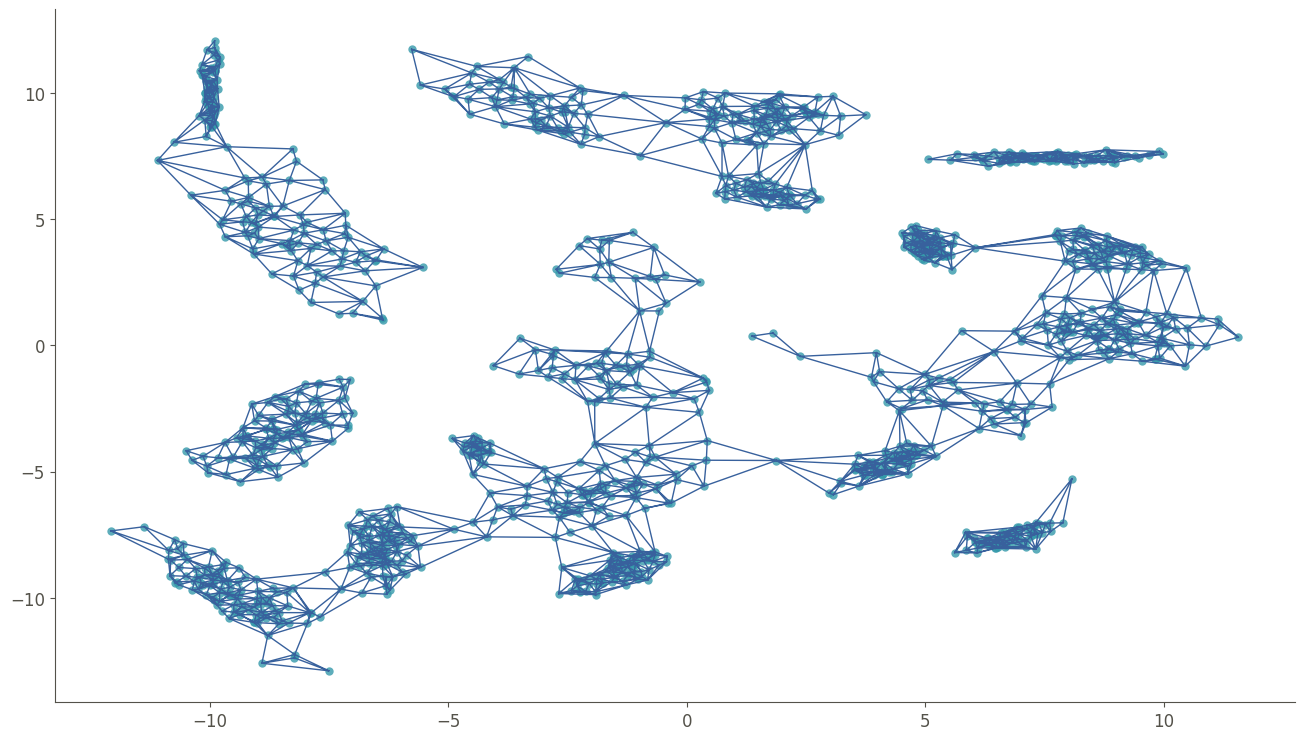

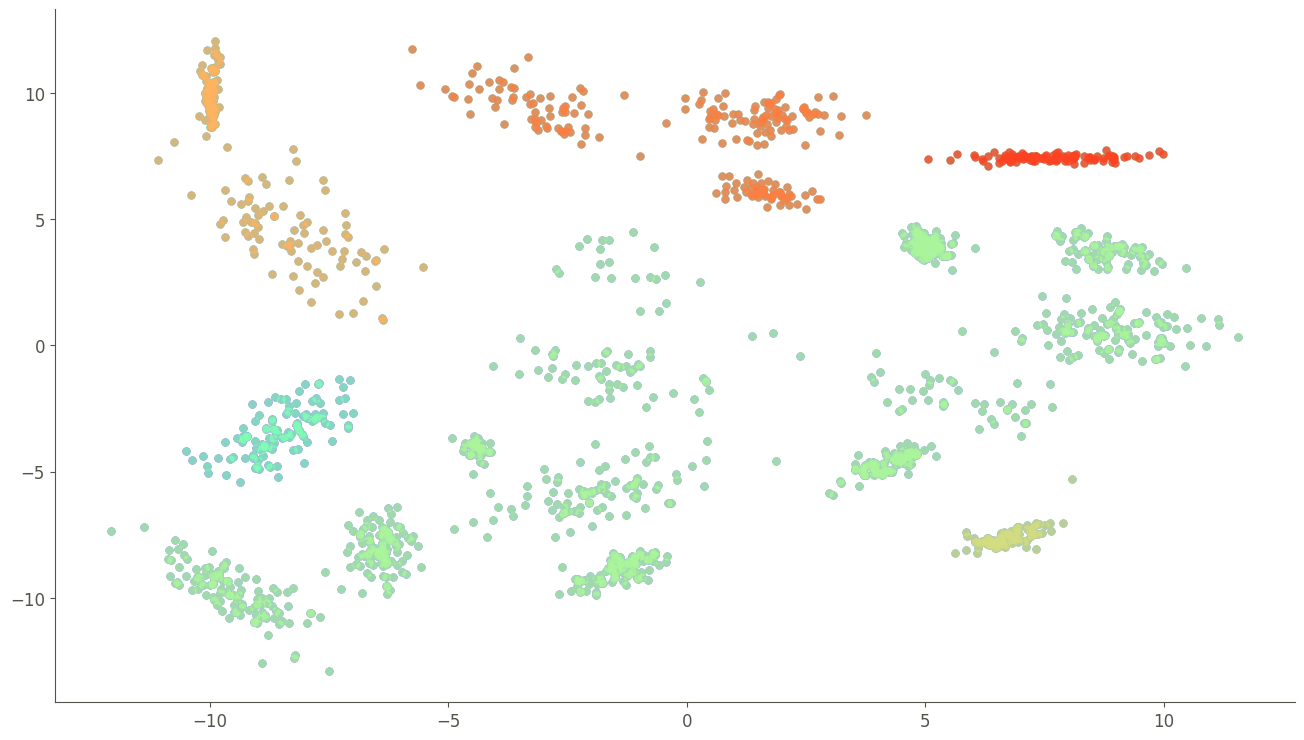

In [9]:
dataset = d2_20c_no0
points = dataset.iloc[:, : -1].to_numpy()
# ac_nd = AlphaShapeND(points, 0.058)
# ac_nd.fit()
n_clusters = 0
alpha = 0.001
ac_nd = AlphaShapeND(points, alpha)
while n_clusters < 18 and alpha < 1.00:
    print(" new run ".center(80, "="))
    ac_nd.fit(alpha)
    clustering = Cluster(ac_nd.get_shape)
    clustering.fit()
    n_clusters = len(clustering.predict())
    alpha += 0.001
    print(f"alpha: {alpha}, n_clusters: {n_clusters}".center(80, "="))
print(f"found {alpha = }")
plot = Plot(vertices = points)
fig = plot.alpha_shape(ac_nd.get_shape)
fig = plot.clusters(clustering.predict())
